<a href="https://colab.research.google.com/github/mackinitup/Project3/blob/master/HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Populating the interactive namespace from numpy and matplotlib


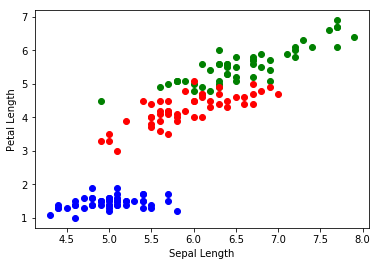

In [0]:
%pylab inline
import pandas as pd
import matplotlib.pylab as plt

df = pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv')

setosa = df[df.species=='setosa']
versicolor = df[df.species=='versicolor']
virginica = df[df.species=='virginica']

s = plot(setosa['sepal_length'],setosa['petal_length'],'bo')
vi = plot(virginica['sepal_length'],virginica['petal_length'],'go')
ve = plot(versicolor['sepal_length'],versicolor['petal_length'],'ro')
lx = ve[0].axes.set_xlabel('Sepal Length')
ly = ve[0].axes.set_ylabel('Petal Length')

In [0]:
%pylab inline
import pandas as pd
import numpy as np
df = pd.read_csv('https://raw.githubusercontent.com/SophMC/LearnDataScience/master/datasets/UN.csv')

print('-----------')
# raw column information plus summary header
print(df[0:10])
print('-----------')
# look at the types of each column explicitly
print('Individual columns - Python data types')
[(x, type(df[x][0])) for x in df.columns]

Populating the interactive namespace from numpy and matplotlib
-----------
          country   region   tfr  contraception  educationMale  \
0     Afghanistan     Asia  6.90            NaN            NaN   
1         Albania   Europe  2.60            NaN            NaN   
2         Algeria   Africa  3.81           52.0           11.1   
3  American.Samoa     Asia   NaN            NaN            NaN   
4         Andorra   Europe   NaN            NaN            NaN   
5          Angola   Africa  6.69            NaN            NaN   
6         Antigua  America   NaN           53.0            NaN   
7       Argentina  America  2.62            NaN            NaN   
8         Armenia   Europe  1.70           22.0            NaN   
9       Australia  Oceania  1.89           76.0           16.3   

   educationFemale  lifeMale  lifeFemale  infantMortality  GDPperCapita  \
0              NaN      45.0        46.0            154.0        2848.0   
1              NaN      68.0        74.0        

/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


[('country', str),
 ('region', str),
 ('tfr', numpy.float64),
 ('contraception', numpy.float64),
 ('educationMale', numpy.float64),
 ('educationFemale', numpy.float64),
 ('lifeMale', numpy.float64),
 ('lifeFemale', numpy.float64),
 ('infantMortality', numpy.float64),
 ('GDPperCapita', numpy.float64),
 ('economicActivityMale', numpy.float64),
 ('economicActivityFemale', numpy.float64),
 ('illiteracyMale', numpy.float64),
 ('illiteracyFemale', numpy.float64)]

In [0]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/SophMC/LearnDataScience/master/datasets/samsung/samsungdata.csv')

In [0]:
df = df.loc[:,~df.columns.duplicated()]

In [0]:
%pylab inline
# We pull in the training, validation and test sets created according to the scheme described
# in the data exploration lesson.

import pandas as pd

samtrain = pd.read_csv('https://raw.githubusercontent.com/SophMC/LearnDataScience/master/datasets/samsung/samtrain.csv')
samval = pd.read_csv('https://raw.githubusercontent.com/SophMC/LearnDataScience/master/datasets/samsung/samval.csv')
samtest = pd.read_csv('https://raw.githubusercontent.com/SophMC/LearnDataScience/master/datasets/samsung/samtest.csv')

# We use the Python RandomForest package from the scikits.learn collection of algorithms. 
# The package is called sklearn.ensemble.RandomForestClassifier

# For this we need to convert the target column ('activity') to integer values 
# because the Python RandomForest package requires that.  
# In R it would have been a "factor" type and R would have used that for classification.

# We map activity to an integer according to
# laying = 1, sitting = 2, standing = 3, walk = 4, walkup = 5, walkdown = 6
# Code is in supporting library randomforest.py


Populating the interactive namespace from numpy and matplotlib


In [0]:
import sklearn.ensemble as sk
#rfc = sk.RandomForestClassifier(n_estimators=500, compute_importances=True, oob_score=True)
rfc = sk.RandomForestClassifier(n_estimators=500, oob_score=True)

train_data = samtrain[samtrain.columns[1:-2]]
train_truth = samtrain['activity']
model = rfc.fit(train_data, train_truth)

In [0]:
rfc.oob_score_

0.979467680608365

In [0]:
fi = enumerate(rfc.feature_importances_)
cols = samtrain.columns

In [0]:
[(value,cols[i]) for (i,value) in fi if value > 0.04]

[(0.041270502861072283, 'Unnamed: 0'),
 (0.0514238880346828, 'tAccMean'),
 (0.042770738500313474, 'tAccStd'),
 (0.043241216338483025, 'tJerkMean'),
 (0.050916205447607686, 'tGyroJerkMagSD'),
 (0.05589032196814731, 'fAccMean'),
 (0.0431791615421185, 'fJerkSD'),
 (0.1348061782453852, 'angleGyroJerkGravity'),
 (0.1700704022184325, 'angleXGravity'),
 (0.0489377741636958, 'angleYGravity')]

In [0]:
val_data = samval[samval.columns[1:-2]]
val_truth = samval['activity']
val_pred = rfc.predict(val_data)

test_data = samtest[samtest.columns[1:-2]]
test_truth = samtest['activity']
test_pred = rfc.predict(test_data)

In [0]:
print("mean accuracy score for validation set = %f" %(rfc.score(val_data, val_truth)))
print("mean accuracy score for test set = %f" %(rfc.score(test_data, test_truth)))

mean accuracy score for validation set = 0.840168
mean accuracy score for test set = 0.901010


In [0]:
import sklearn.metrics as skm
test_cm = skm.confusion_matrix(test_truth,test_pred)

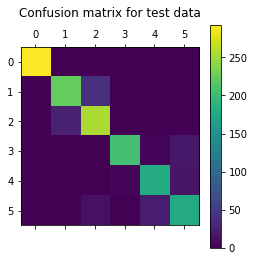

In [0]:
import pylab as pl
pl.matshow(test_cm)
pl.title('Confusion matrix for test data\n'
         + '                               ')
pl.colorbar()
pl.show()

In [0]:
print("Accuracy = %f" %(skm.accuracy_score(test_truth,test_pred)))

Accuracy = 0.901010


In [0]:
print("Precision = %f" %(skm.precision_score(test_truth,test_pred)))

ValueError: ignored

In [0]:
print("Precision = %f" %(skm.precision_score(test_truth,test_pred)))

In [0]:
print("F1 score = %f" %(skm.f1_score(test_truth,test_pred)))